# nema4  (20 mm LXe) 

- PRODUCED BY NEW SCHEMA, 5 10^6 events
- Phantom : nema 4
- Events: all
- Detector geometry: SiPMs in LXe, with Hamamatsu sipms
- Time resolution: 50 ps
- qcut > 2 pes
- ntof = 7
- PDE = 0.3
- LXe: 20 mm

In [1]:
using Pkg
Pkg.activate(normpath(joinpath(@__DIR__, "..")))  #activate environment in ,,/src

In [2]:
using Plots
using DataFrames
using HDF5
using PhysicalConstants
using PhysicalConstants.CODATA2018
using Unitful

In [3]:
using Glob
using CSV

In [4]:
using Statistics
using StatsBase
using Printf

In [5]:
using Logging

In [6]:
using ATools

┌ Info: Precompiling ATools [f146b9ee-cb39-4cb9-873f-768aeedb20d7]
└ @ Base loading.jl:1317


In [12]:
include("../src/ANema.jl") 

Main.ANema

In [8]:
println(names(ATools))

[:ATools, :centers, :dxyz, :edges, :find_max_xy, :fit, :fit_gauss, :fit_gauss_fm, :fit_pol1, :fit_pol2, :fit_pol3, :fit_profile, :fitg1, :fitg2, :fphi, :gline2p, :hist1d, :hist2d, :in_range, :mean_std, :p1df, :phixy, :plot_fit_gauss, :rxy, :select_by_column_value, :select_by_column_value_closed_interval, :select_by_column_value_closed_left_interval, :select_by_column_value_closed_right_interval, :select_by_column_value_ge, :select_by_column_value_gt, :select_by_column_value_interval, :select_by_column_value_le, :select_by_column_value_lt, :select_by_index, :select_event, :wstd]


In [13]:
println(names(ANema))

[:ANema, :cdoi, :crt, :ctsr, :deltatime, :dftolor, :distance_lor_to_point, :radial_correcction, :readdf, :selectinterval, :setunits, :sinogramdf, :thetasgrm, :write_lors_hdf5, :writemdf, :zsgrm, :ztsinogram]


In [10]:
import Unitful:
    nm, μm, mm, cm, ns, μs, ms, ps, s

In [14]:
function loglevel(log)
    if log == "Debug"
        logger = SimpleLogger(stdout, Logging.Debug)
    elseif log =="Info"
        logger = SimpleLogger(stdout, Logging.Info)
    else
        logger = SimpleLogger(stdout, Logging.Warn)
    end
    old_logger = global_logger(logger)
end

loglevel (generic function with 1 method)

## NB functions
- These are specific for plotting and are better kept in the NB

In [60]:
# Return Scatters, Trues and Prompts

function stp(hrl; i0 = 5, i1 = 15)
    w = Float64.(hrl.weights)
    e = hrl.edges[1]
    w0 = w[i0]
    w1 = w[i1]
    wm, im, em = find_max_xy(w, e)
    spb = w[i0:i1]
    fxy = gline2p(i0,w0,i1, w1)
    bkg = [fxy(i) for i in i0:i1]
    sgn = spb - bkg
    sgn = [s >0 ? ceil(s) : 0.0 for s in sgn]
    T = sum(sgn)
    P = sum(w)
    S = P - T

    @info "i0 = %d, im= %d, i1 = %d" i0 im i1
    @info "w0 = %5.1f, wm= %5.1f, w1 =%5.1f" w0 wm w1

    return S,T,P
end



stp (generic function with 1 method)

In [62]:
loglevel("Warn")

Base.CoreLogging.SimpleLogger(IJulia.IJuliaStdio{Base.PipeEndpoint}(IOContext(Base.PipeEndpoint(RawFD(42) open, 0 bytes waiting))), Info, Dict{Any, Int64}())

# Notebook

In [17]:
norm = 5.0e+6
dir = "../data/"
dirp = "../plots"
conf = "n4-w-20mm-qc2"
out = string(conf, "-mdf")
path = joinpath(dir, conf)
pathp = joinpath(dirp, conf)
patho = joinpath(dir, out)

if isdir(pathp) == false
    mkdir(pathp)
end

if isdir(patho) == false
    mkdir(patho)
end
println("input dir ", path)
println("plots in ", pathp)
println("merged DF in ", patho)

input dir ../data/n4-w-20mm-qc2
plots in ../plots/n4-w-20mm-qc2
merged DF in ../data/n4-w-20mm-qc2-mdf


In [18]:
ndf = ANema.readdf(path)
println("data frame names ", names(ndf))

data frame names ["nsipm1", "nsipm2", "phistd1", "phistd2", "q1", "q2", "r1", "r2", "t1", "t2", "ta1", "ta2", "tr1", "tr2", "ux", "uy", "uz", "x1", "x2", "xb1", "xb2", "xr1", "xr2", "xs", "xt1", "xt2", "y1", "y2", "yb1", "yb2", "yr1", "yr2", "ys", "yt1", "yt2", "z1", "z2", "zb1", "zb2", "zr1", "zr2", "zs", "zstd1", "zstd2", "zt1", "zt2"]


In [19]:
println("data frame has length of ", nrow(ndf), " fraction =", nrow(ndf)/norm)

data frame has length of 2694535 fraction =0.538907


## q1 vs q2

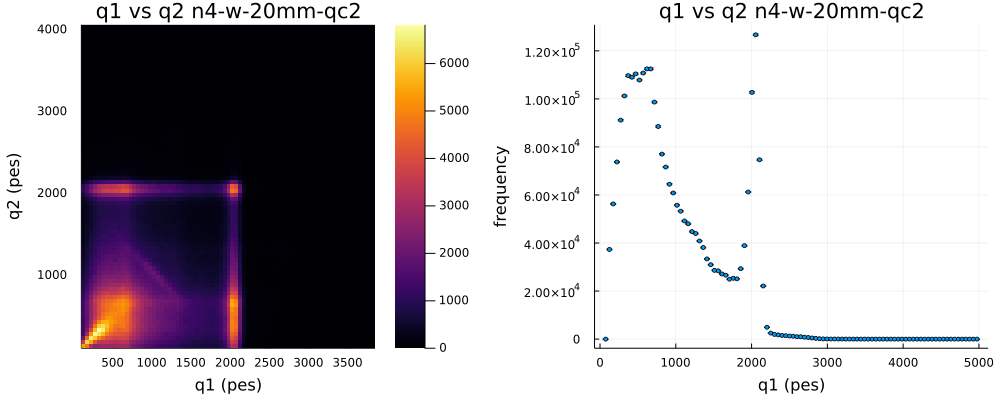

In [20]:
ANema.q1vsq2(ndf, tit="q1 vs q2 $conf", filename=joinpath(pathp, "q1q2"), save=true)

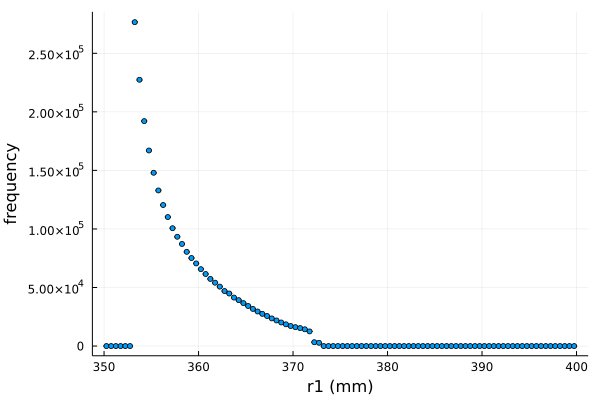

In [21]:
h,p = hist1d(ndf.r1, "r1 (mm)", 100, 350., 400.)
plot(p)

## Cut in (q1,q2) 

In [22]:
wmin = 1900.0
wmax = 2200.0
ndfq =ANema.selectinterval(ndf, "q1", "q2", wmin, wmax);
println("after q1q2 cut: ndfq has a length of ", nrow(ndfq), " fraction = ", nrow(ndfq)/norm)

after q1q2 cut: ndfq has a length of 56130 fraction = 0.011226


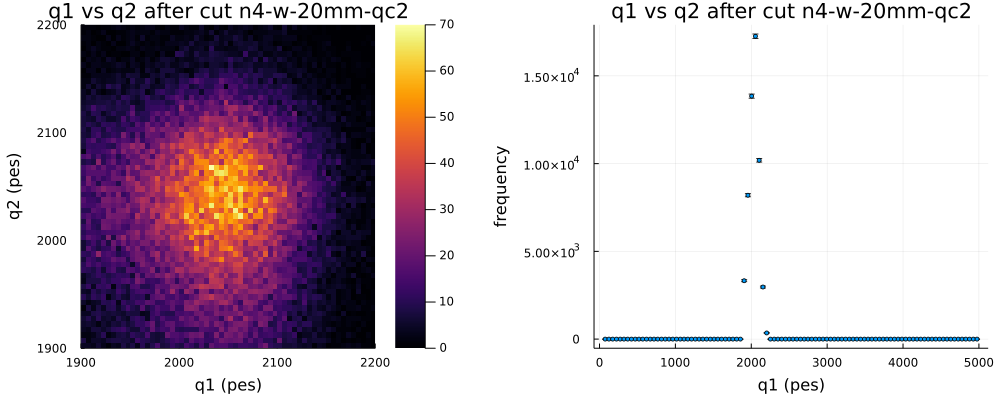

In [23]:
ANema.q1vsq2(ndfq, tit="q1 vs q2 after cut $conf", 
filename=joinpath(pathp, "q1q2-qcut"), save=true)

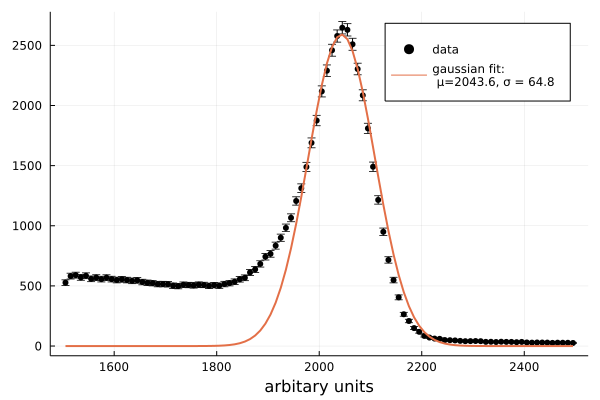

In [24]:
fg, p = ATools.plot_fit_gauss(ndf.q1, "energy (pes)", "arbitary units", 100, 1500.0, 2500.0,
                       xgmin = 1950.0, xgmax = 2100., gbins=50)
plot(p)

In [25]:
@printf " resolution (σE/E) = %5.2f" fg.std[1] / fg.mu[1]

 resolution (σE/E) =  0.03

In [26]:
@printf " resolution (σE/E) window = %5.2f" (wmax -wmin) / fg.mu[1]

 resolution (σE/E) window =  0.15

## r vs q

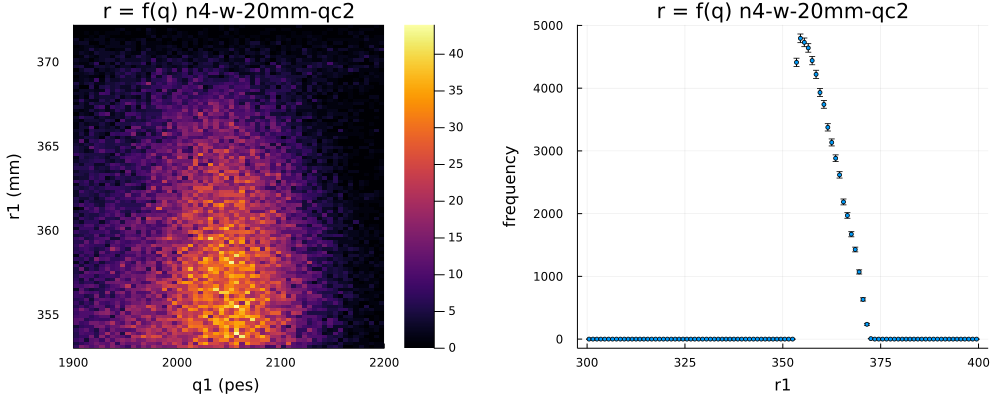

In [27]:
ANema.r1q1(ndfq,tit="r = f(q) $conf", filename=joinpath(pathp, "rq"), save=true)

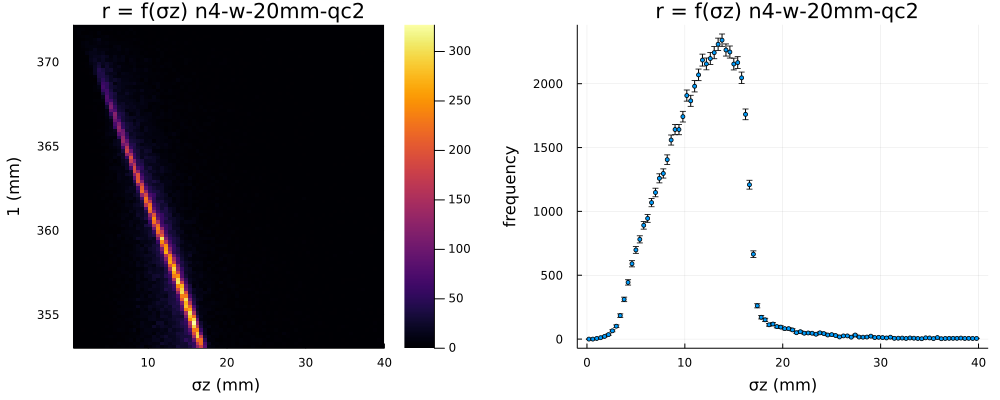

In [28]:
ANema.zstd(ndfq, tit=" r = f(σz) $conf", filename=joinpath(pathp, "zstd"), save=true)

In [29]:
ndfz =ANema.selectinterval(ndfq, "zstd1", "zstd2", 1.0, 17.0);
println("after zstd cut: ndfz has a length of ", nrow(ndfz))

after zstd cut: ndfz has a length of 51473


Fit parameters: a = 372.75 b = -1.13 c = 0.001 Fit errors: a =   0.2 b = 0.056 c = 0.003

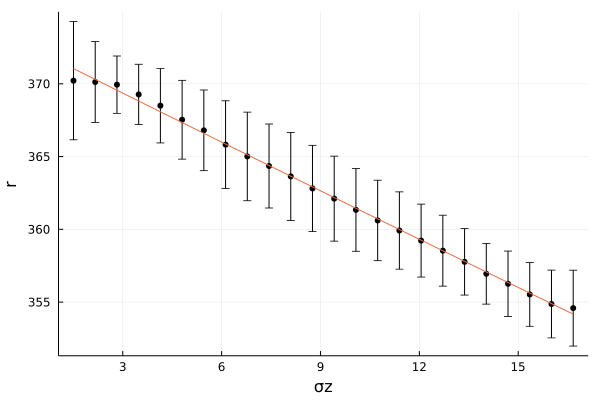

In [30]:
fz2, pz2 = fit_profile(ndfz.zstd1, ndfz.r1, "σz", "r", "pol2")
fpars = fz2.fitpar
fstds = fz2.fitstd
@printf "Fit parameters: a = %5.2f b = %5.2f c = %5.2g " fpars[1] fpars[2] fpars[3]
@printf "Fit errors: a = %5.1g b = %5.2g c = %5.2g" fstds[1] fstds[2] fstds[3]
ANema.pout(pz2, joinpath(pathp, "zstd-fitpol2"))
plot(pz2)

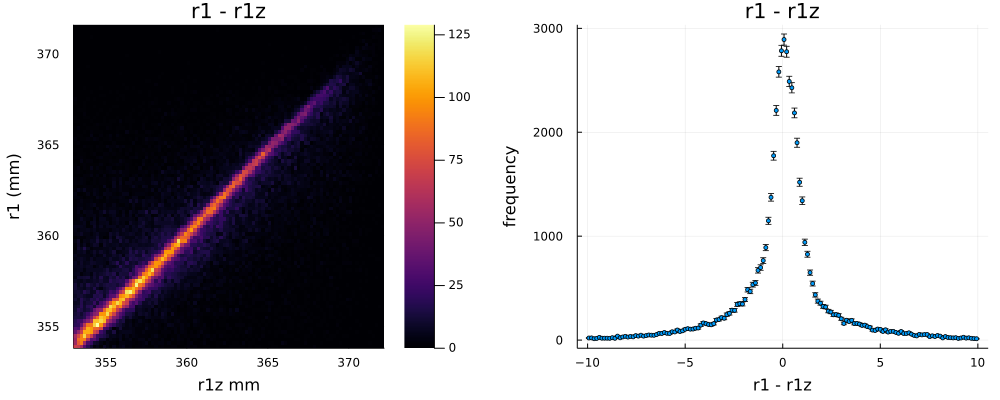

In [32]:
r1z = fz2.g.(ndfz.zstd1) + 0.0 * ones(length(ndfz.q1)) ; 
ANema.plotreso(r1z, ndfz.r1, "r1z mm", "r1 (mm)", -10., 10., tit="r1 - r1z", 
         filename=joinpath(pathp, "r1-r1z-zcut"), save=true)


r-rz σ1 =   2.797 σ2 =   0.606

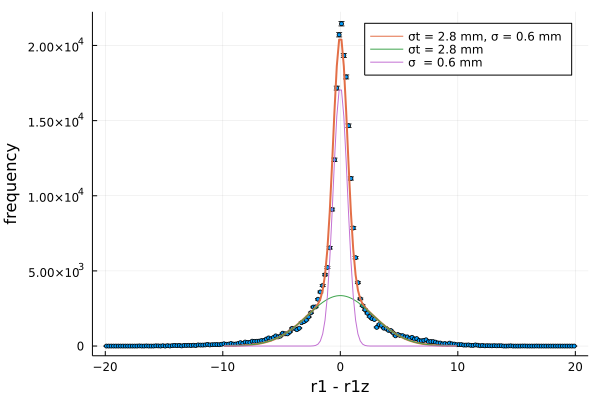

In [33]:
fg, p = fitg2(r1z - ndfz.r1, "r1 - r1z", 200, -20.0, 20.0, 
                      xg1min=-10.0, xg1max=-5.0, 
                      xg2min=-5.0,  xg2max =5.0, 
                      xgmin =-10.0, xgmax  =10.0)
@printf "r-rz σ1 = %7.3f σ2 = %7.3f" fg.std[1] fg.std[2]
ANema.pout(p, joinpath(pathp, "zstd-fitg2"))
plot(p)

Fit parameters: a = 372.75 b = -1.13 c = 0.001 Fit errors: a =   0.2 b = 0.056 c = 0.003

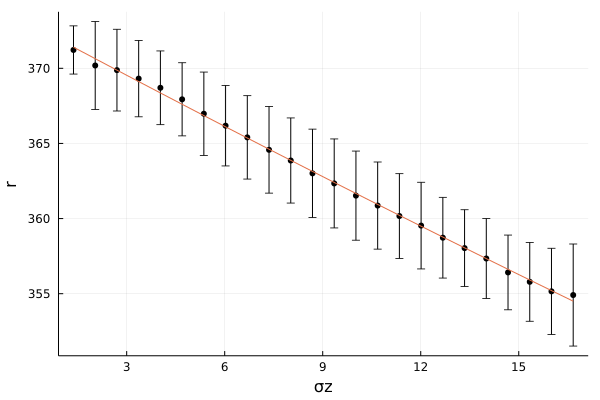

In [35]:
fzr2, pzr2 = fit_profile(ndfz.zstd2, ndfz.r2, "σz", "r", "pol2")
fpars = fz2.fitpar
fstds = fz2.fitstd
@printf "Fit parameters: a = %5.2f b = %5.2f c = %5.2g " fpars[1] fpars[2] fpars[3]
@printf "Fit errors: a = %5.1g b = %5.2g c = %5.2g" fstds[1] fstds[2] fstds[3]
ANema.pout(pzr2,joinpath(pathp, "zstd-fitpol2"))
plot(pzr2)

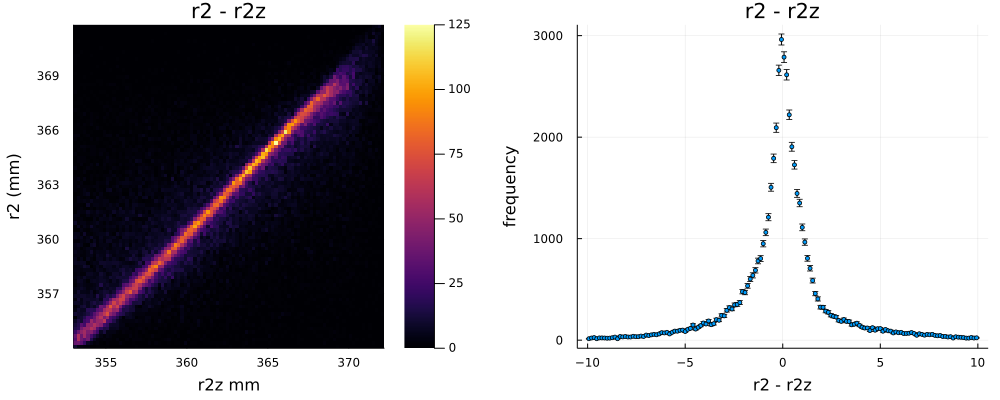

In [36]:
r2z = fzr2.g.(ndfz.zstd2) + 0.0 * ones(length(ndfz.q2)) 
ANema.plotreso(r2z, ndfz.r2, "r2z mm", "r2 (mm)", -10., 10.0, tit="r2 - r2z", 
         filename=filename=joinpath(pathp, "r1-r1z"), save=true)


r-rz σ1 =   2.149 σ2 =   0.507

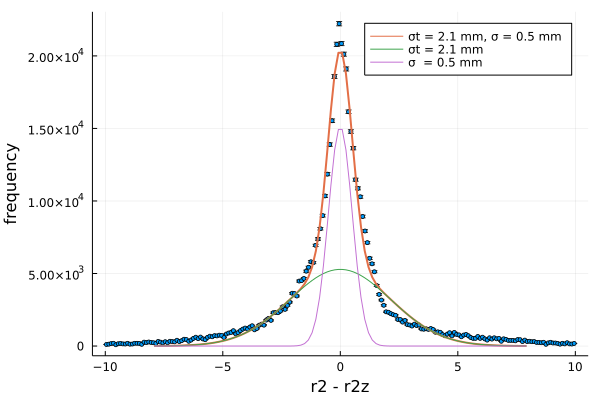

In [37]:
fg, p = fitg2(r2z - ndfz.r2, "r2 - r2z", 200, -10.0, 10.0, 
                      xg1min=-8.0, xg1max=-2.5, 
                      xg2min=-2.5,  xg2max =2.5, 
                      xgmin =-8.0, xgmax  =8.0)
@printf "r-rz σ1 = %7.3f σ2 = %7.3f" fg.std[1] fg.std[2]
ANema.pout(p, joinpath(pathp, "zstd-fitg2-r2"))
plot(p)

## Resolution in (x,y,z,r) intrinsic

 σx =     0.2 mm σy =     0.2 mm σz =     0.4 mm

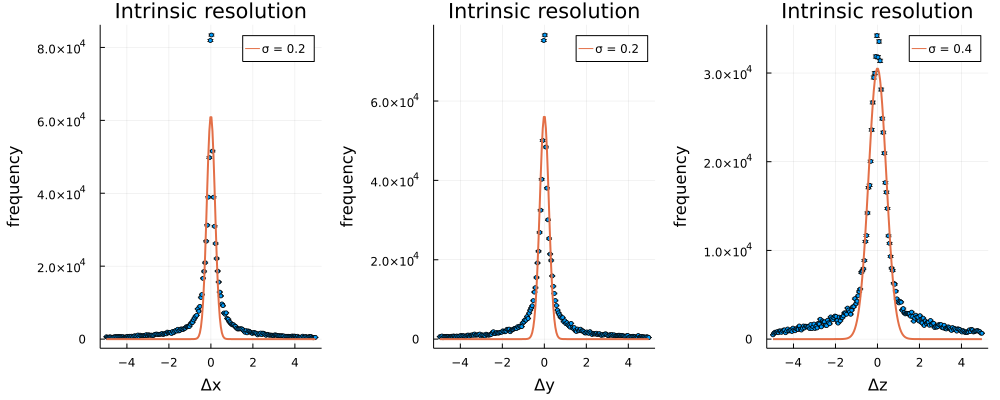

In [38]:
fg,px = fitg1(ndfz.xt1 - ndfz.x1, "Δx", 200, -5.0, 5.0, xgmin=-1.5, xgmax=1.5)
@printf " σx = %7.1f mm" fg.std[1]
fg,py = fitg1(ndfz.yt1 - ndfz.y1, "Δy", 200, -5.0, 5.0, xgmin=-1.5, xgmax=1.5)
@printf " σy = %7.1f mm" fg.std[1]
fg,pz = fitg1(ndfz.zt1 - ndfz.z1, "Δz", 200, -5.0, 5.0, xgmin=-1.5, xgmax=1.5)
@printf " σz = %7.1f mm" fg.std[1]
ANema.plot_and_save(px,py, pz, "Intrinsic resolution", joinpath(pathp, "Intrinsic-res")) 

## Resolución reco

## Position from best estimator (r1p)

In [39]:
xz1,yz1,zz1 = ANema.radial_correction(ndfz.xr1, ndfz.yr1, ndfz.zr1, r1z);
xz2,yz2,zz2 = ANema.radial_correction(ndfz.xr2, ndfz.yr2, ndfz.zr2, r2z);

 σx1 =  0.63 mm σy1 =  0.60 mm σz =  0.42 mm

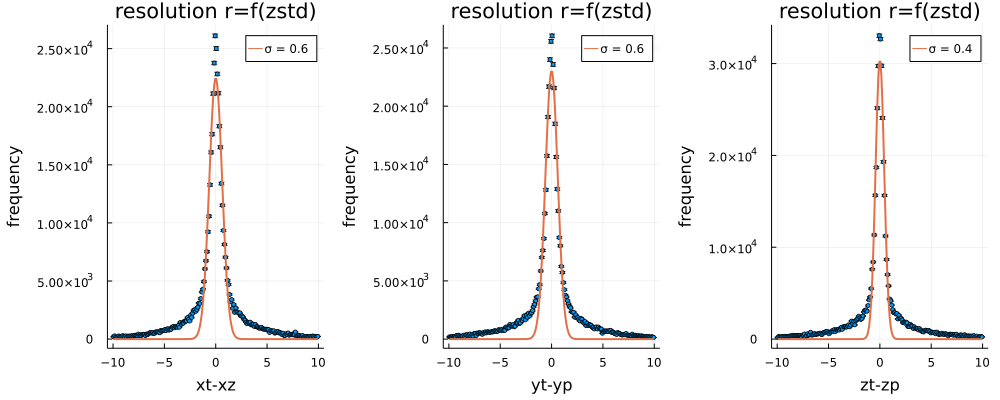

In [40]:
fg,pzx1 = fitg1(ndfz.xt1 - xz1, "xt-xz", 200, -10.0, 10.0, xgmin=-5.0, xgmax=5.0)
@printf " σx1 = %5.2f mm" fg.std[1] 
fg,pzy1 = fitg1(ndfz.yt1 - yz1, "yt-yp", 200, -10.0, 10.0, xgmin=-5.0, xgmax=5.0)
@printf " σy1 = %5.2f mm" fg.std[1] 
fg,pzz1 = fitg1(ndfz.zt1 - zz1, "zt-zp", 200, -10.0, 10.0, xgmin=-5.0, xgmax=5.0)
@printf " σz = %5.2f mm" fg.std[1]
ANema.plot_and_save(pzx1,pzy1, pzz1, "resolution r=f(zstd)", joinpath(pathp, "zstd-res-r1")) 

 σx1 =  0.62 mm σy1 =  0.60 mm σz =  0.39 mm

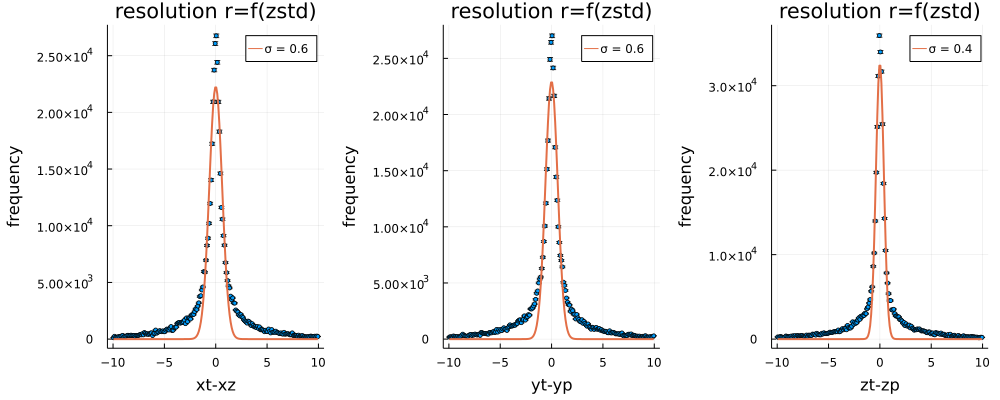

In [41]:
fg,pzx2 = fitg1(ndfz.xt2 - xz2, "xt-xz", 200, -10.0, 10.0, xgmin=-5.0, xgmax=5.0)
@printf " σx1 = %5.2f mm" fg.std[1] 
fg,pzy2 = fitg1(ndfz.yt2 - yz2, "yt-yp", 200, -10.0, 10.0, xgmin=-5.0, xgmax=5.0)
@printf " σy1 = %5.2f mm" fg.std[1] 
fg,pzz2 = fitg1(ndfz.zt2 - zz2, "zt-zp", 200, -10.0, 10.0, xgmin=-5.0, xgmax=5.0)
@printf " σz = %5.2f mm" fg.std[1]
ANema.plot_and_save(pzx2,pzy2, pzz2, "resolution r=f(zstd)", joinpath(pathp, "zstd-res-r2")) 

In [42]:
@printf "typical resolution (FWHM) = %5.2f" 2.3 * fg.std[1]

typical resolution (FWHM) =  0.89

In [43]:
ndfz[!,"r1x"] = r1z;
ndfz[!,"r2x"] = r2z;

## TOF

In [44]:
dfz = ANema.setunits(ndfz);

First photon, position true: FWHM1 = 224.877 FWHM2 =  31.332

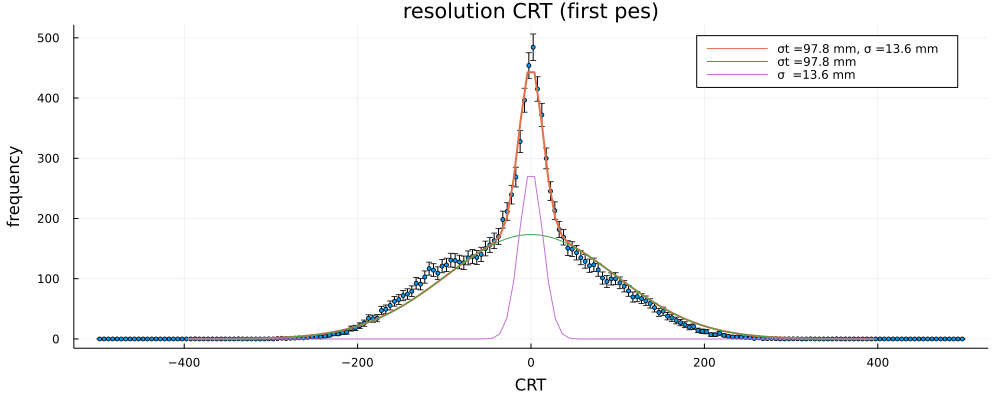

In [45]:
dt = ANema.crt(dfz, ANema.dtfirst, ANema.postrue)
fg, p = fitg2(dt, "CRT", 200, -500.0, 500.0, 
                      xg1min=-400.0, xg1max=-50.0, 
                      xg2min=-50.0,  xg2max =50.0, 
                      xgmin =-400.0, xgmax  =400.0)
@printf "First photon, position true: FWHM1 = %7.3f FWHM2 = %7.3f" 2.3*fg.std[1] 2.3*fg.std[2]
ANema.plot_and_save(p, "resolution CRT (first pes)", joinpath(pathp, "CRT-first")) 

fastest photoelectron, position reco: FWHM = 225.013

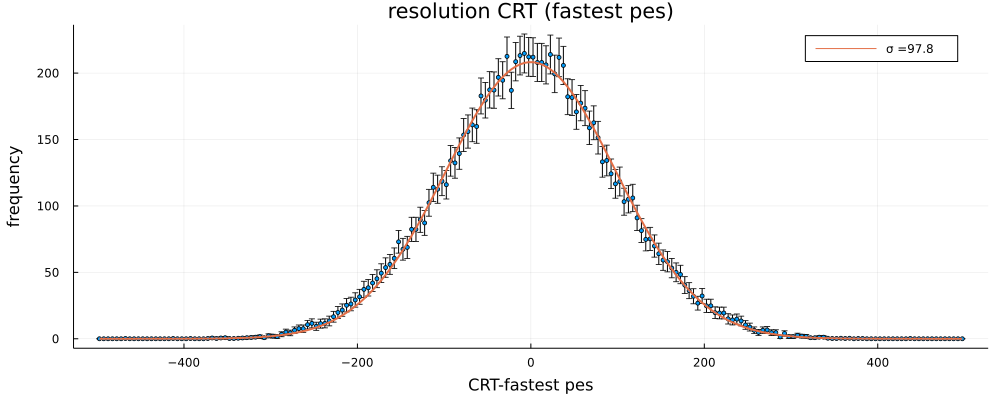

In [46]:
dt = ANema.crt(dfz,  ANema.dtminimum, ANema.postrue)
fg,p = ANema.fitg1(dt.+10.0, "CRT-fastest pes", 200, -500.0, 500.0,  
                     xgmin=-400.0, xgmax=400.0)
@printf "fastest photoelectron, position reco: FWHM = %7.3f" 2.3*fg.std[1] 
ANema.plot_and_save(p, "resolution CRT (fastest pes)", joinpath(pathp, "CRT-fastest")) 

fastest photoelectron, position reco: FWHM = 231.652

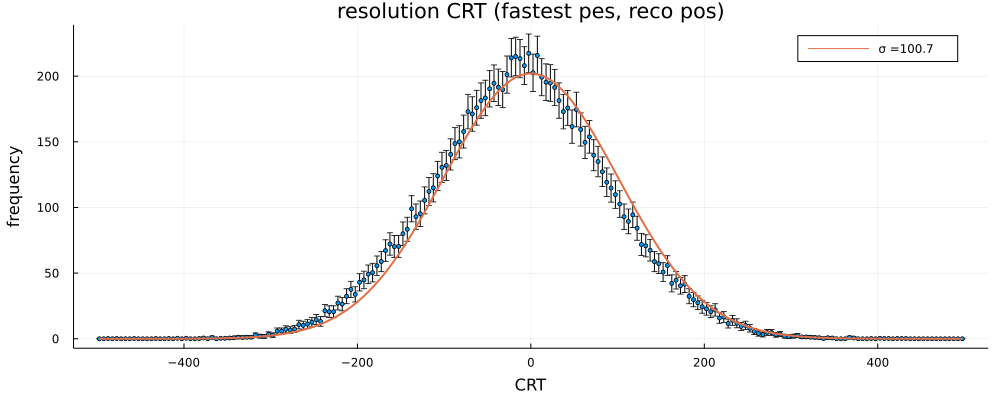

In [47]:
dt = ANema.crt(dfz,  ANema.dtminimum, ANema.posrecall)
fg,p = fitg1(dt, "CRT", 200, -500.0, 500.0,  
                     xgmin=-400.0, xgmax=400.0)
@printf "fastest photoelectron, position reco: FWHM = %7.3f" 2.3*fg.std[1] 
ANema.plot_and_save(p, "resolution CRT (fastest pes, reco pos)", joinpath(pathp, "CRT-fastest-reco")) 

average photoelectrons, position reco: FWHM = 225.928

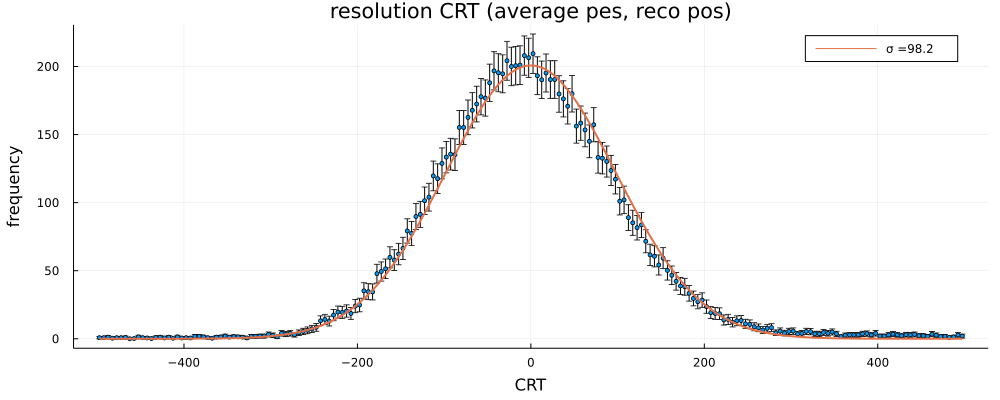

In [48]:
dt = ANema.crt(dfz, ANema.dtaverage, ANema.posrecall)
fg,p = fitg1(dt, "CRT", 200, -500.0, 500.0,  
                     xgmin=-400.0, xgmax=400.0)
@printf "average photoelectrons, position reco: FWHM = %7.3f" 2.3*fg.std[1] 
ANema.plot_and_save(p, "resolution CRT (average pes, reco pos)", joinpath(pathp, "CRT-average-reco")) 

## Save

In [49]:
ANema.writemdf(patho,"mdf-zstd-$conf.csv", ndfz)

"../data/n4-w-20mm-qc2-mdf/mdf-zstd-n4-w-20mm-qc2.csv"

## NEMA4

In [50]:
lors_average_recall = ANema.dftolor(dfz, ANema.dtaverage, ANema.posrecall, f32= false);

In [51]:
println("size of data set =", nrow(ndfz), " fraction =", nrow(ndfz)/norm)

size of data set =51473 fraction =0.0102946


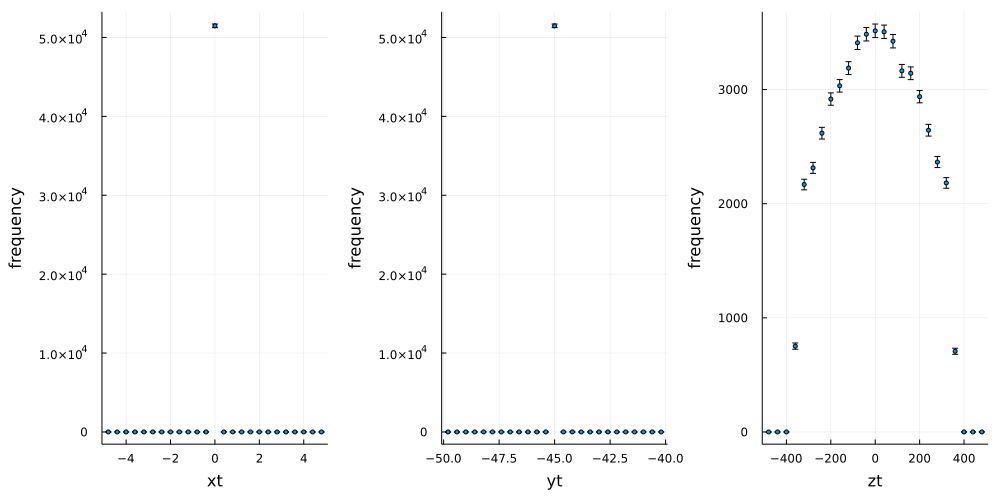

In [52]:
hx,px = hist1d(ndfz.xs, "xt", 25, -5.0, 5.0, norm=false)
hz,pz = hist1d(ndfz.zs, "zt", 25, -500.0, 500.0, norm=false)
hy,py = hist1d(ndfz.ys, "yt", 25, -50.0, -40.0, norm=false)
plot(px,py,pz, layout= (1, 3), legend=false, fmt = :png, size = (1000, 500),
        left_margin=5Plots.mm, right_margin=1Plots.mm, bottom_margin=5Plots.mm)

In [54]:
sxdf = ANema.sinogramdf(lors_average_recall)
first(sxdf,5)

,x1,y1,z1,x2,y2,z2,zl,rl,tl
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,-353.841,-35.9642,-463.185,359.986,-73.7192,-64.8933,-398.292,54.6029,-1.67209
2,293.363,201.292,155.504,-258.475,-261.814,-467.848,623.353,34.3934,0.969423
3,348.839,85.4973,-18.0858,-323.347,-165.512,238.707,-256.793,41.9384,1.33044
4,270.071,233.798,439.764,-227.617,-278.347,-214.365,654.129,30.7466,0.857263
5,359.259,20.1892,-300.91,-345.16,-106.929,-255.017,-45.8924,43.9326,1.51466


In [55]:
nbint = 4
drl = ANema.ztsinogram(sxdf, nbinz=1, zmin=-350.0, zmax=350.0,
                       nbint=nbint, tmin=-Float64(π), tmax=Float64(π))

Dict{Any, Any} with 1 entry:
  1 => DataFrame[14068×9 DataFrame…

In [57]:
HR, PR = ANema.thetasgrm(drl, nbint=4, nbin=20);

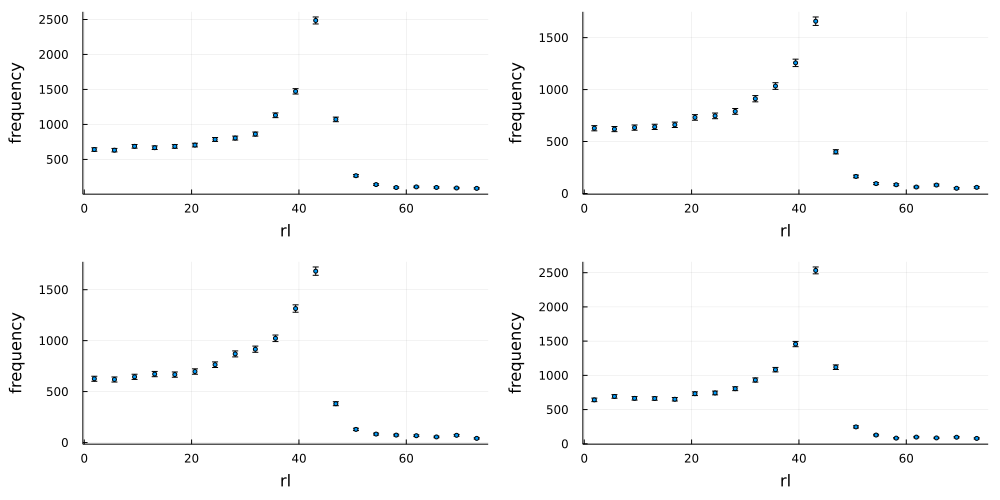

In [58]:
plot(PR[1], PR[2], PR[3], PR[4], layout= (2, 2), legend=false, fmt = :png, size = (1000, 500),
        left_margin=5Plots.mm, right_margin=1Plots.mm, bottom_margin=5Plots.mm)

In [63]:
for (i, hrl) in enumerate(HR)
    println("theta bin =", i)
    S,T,P = stp(hrl, i0 = 4, i1 = 15)
    @printf " T = %5.1f S = %5.1f P = %5.1f" T S P
    println()
    nec = T/(1 + S/T)   
    @printf " nec = %5.1f, SNR = %5.1f NEC/P = %5.2f " nec sqrt(nec) nec/P
end

theta bin =1
 T = 6242.0 S = 7278.0 P = 13520.0
 nec = 2881.8, SNR =  53.7 NEC/P =  0.21 theta bin =2
 T = 4681.0 S = 6629.0 P = 11310.0
 nec = 1937.4, SNR =  44.0 NEC/P =  0.17 theta bin =3
 T = 4681.0 S = 6715.0 P = 11396.0
 nec = 1922.8, SNR =  43.8 NEC/P =  0.17 theta bin =4
 T = 6357.0 S = 7175.0 P = 13532.0
 nec = 2986.4, SNR =  54.6 NEC/P =  0.22 

In [64]:
nbint = 1
nbinz = 4
drl = ANema.ztsinogram(sxdf, nbinz=nbinz, zmin=-350.0, zmax=350.0,
                nbint=nbint, tmin=-Float64(π), tmax=Float64(π))

Dict{Any, Any} with 4 entries:
  4 => DataFrame[8391×9 DataFrame…
  2 => DataFrame[10227×9 DataFrame…
  3 => DataFrame[10109×9 DataFrame…
  1 => DataFrame[8374×9 DataFrame…

In [66]:
HR, PR = ANema.zsgrm(drl, nbinz=4, nbin=20);

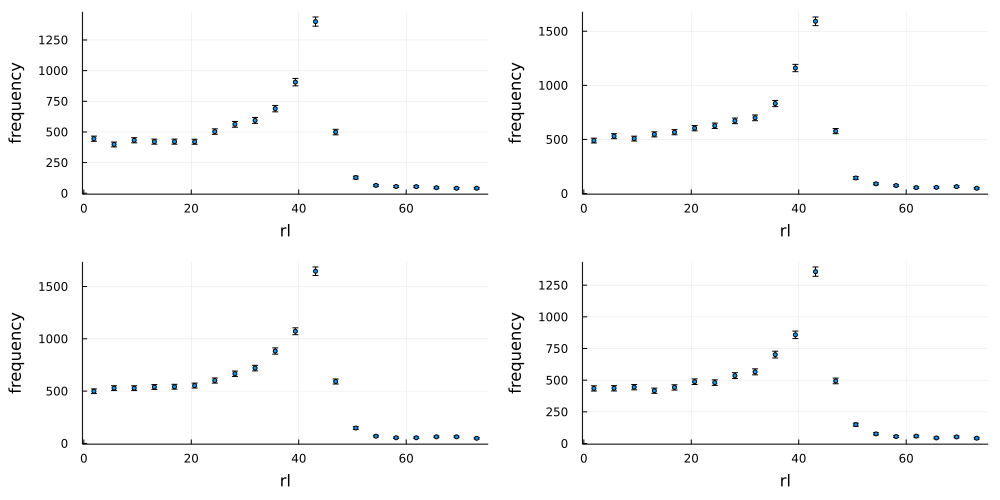

In [67]:
plot(PR[1], PR[2], PR[3], PR[4], layout= (2, 2), legend=false, fmt = :png, size = (1000, 500),
        left_margin=5Plots.mm, right_margin=1Plots.mm, bottom_margin=5Plots.mm)

In [68]:
for (i, hrl) in enumerate(HR)
    println("z bin =", i)
    S,T,P = stp(hrl, i0 = 4, i1 = 15)
    @printf " T = %5.1f S = %5.1f P = %5.1f" T S P
    println()
    nec = T/(1 + S/T)   
    @printf " nec = %5.1f, SNR = %5.1f NEC/P = %5.2f " nec sqrt(nec) nec/P
end

z bin =1
 T = 3703.0 S = 4416.0 P = 8119.0
 nec = 1688.9, SNR =  41.1 NEC/P =  0.21 z bin =2
 T = 4295.0 S = 5644.0 P = 9939.0
 nec = 1856.0, SNR =  43.1 NEC/P =  0.19 z bin =3
 T = 4387.0 S = 5481.0 P = 9868.0
 nec = 1950.3, SNR =  44.2 NEC/P =  0.20 z bin =4
 T = 3609.0 S = 4525.0 P = 8134.0
 nec = 1601.3, SNR =  40.0 NEC/P =  0.20 

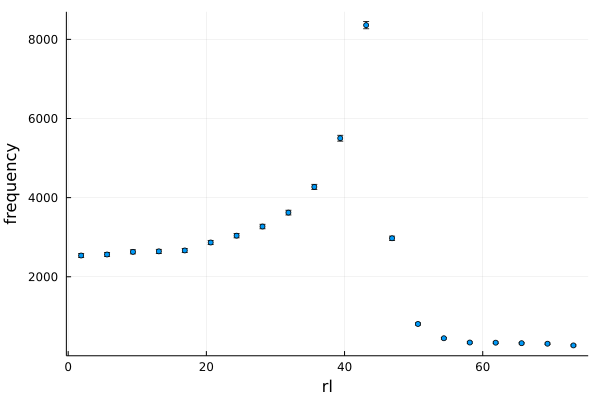

In [69]:
hrl,prl = hist1d(sxdf.rl, "rl", 20, 0.0, 75.0)
plot(prl)

In [70]:
S,T,P = stp(hrl, i0 = 5, i1 = 15)

(29044.0, 20714.0, 49758.0)

In [71]:
@printf " T = %5.1f S = %5.1f P = %5.1f" T S P
println()
nec = T/(1 + S/T)

@printf " nec = %5.1f, SNR = %5.1f NEC/P = %5.2f " nec sqrt(nec) nec/P

 T = 20714.0 S = 29044.0 P = 49758.0
 nec = 8623.1, SNR =  92.9 NEC/P =  0.17 

In [72]:
L = 700.0 # length of phantom
d = 3.2 # diameter of phantom
V = π*(d/2.0)^2 * L
@printf " Phantom: L(mm) = %5.1f d (mm) = %5.1f V (mm3 = mL) =%5.1f" L d V

 Phantom: L(mm) = 700.0 d (mm) =   3.2 V (mm3) =5629.7

In [ ]:
A = 10.0 # kBq/mL 